# Proyecto 4 AAD
## Sara Palacios, Samuel Pérez, Nicolás Rojas y Andrés Zapata

### Análisis descriptivo 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Grouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

In [3]:
df = pd.read_csv("datos.txt", 
                index_col="Date",
                dtype={'Temp': np.float32},
                parse_dates=True,
                date_parser=lambda date: pd.datetime.strptime(date, '%Y-%m-%d'))

In [4]:
df.head()

Temp
Date            
1981-01-01 20.70
1981-01-02 17.90
1981-01-03 18.80
1981-01-04 14.60
1981-01-05 15.80

In [5]:
s = pd.Series(df.unstack().values, index=df.index)

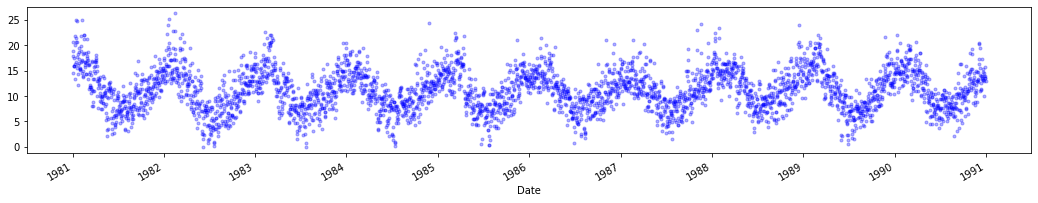

In [6]:
s.plot(style='b.',alpha=0.3);

In [7]:
s.describe()

count   3650.00
mean      11.18
std        4.07
min        0.00
25%        8.30
50%       11.00
75%       14.00
max       26.30
dtype: float64

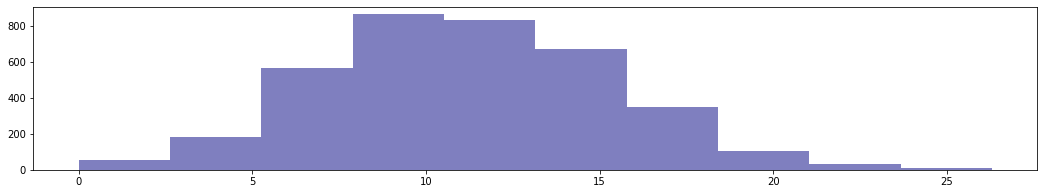

In [8]:
s.hist(alpha = 0.5,color='navy',grid=False);

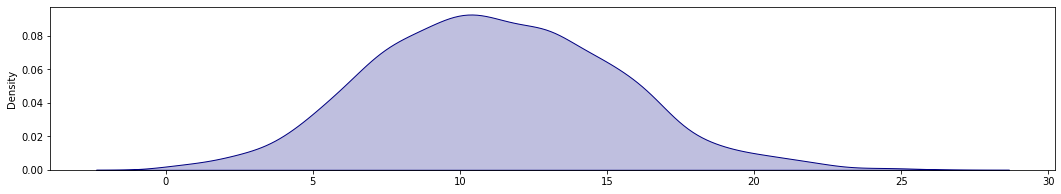

In [9]:
sns.kdeplot(s, shade=True,color='navy' );

In [10]:
s.groupby(Grouper(freq='Y'))
s

Date
1981-01-01   20.70
1981-01-02   17.90
1981-01-03   18.80
1981-01-04   14.60
1981-01-05   15.80
              ... 
1990-12-27   14.00
1990-12-28   13.60
1990-12-29   13.50
1990-12-30   15.70
1990-12-31   13.00
Length: 3650, dtype: float32

In [11]:
years, index = [], []
for name, gr in s.groupby(Grouper(freq='Y')):
    years.append(gr.values)
    index.append(name.year)
df = pd.DataFrame(years, index=index, columns=range(1,366))

In [12]:
df.head(10)

1     2     3     4     5     6     7     8     9     10   ...   356  \
1981 20.70 17.90 18.80 14.60 15.80 15.80 15.80 17.40 21.80 20.00  ... 15.00   
1982 17.00 15.00 13.50 15.20 13.00 12.50 14.10 14.80 16.20 15.80  ... 10.80   
1983 18.40 15.00 10.90 11.40 14.80 12.10 12.80 16.20 15.50 13.00  ... 12.20   
1984 19.50 17.10 17.10 12.00 11.00 16.30 16.10 13.00 13.40 15.20  ... 14.20   
1985 13.30 15.20 13.10 12.70 14.60 11.00 13.20 12.20 14.40 13.70  ... 13.70   
1986 12.90 13.80 10.60 12.60 13.70 12.60 13.10 15.40 11.90 13.80  ... 11.60   
1987 12.30 13.80 15.30 15.60 16.20 16.30 16.80 11.00  8.50 13.20  ... 11.20   
1988 15.30 14.30 13.50 15.00 13.60 15.20 17.00 18.70 16.50 17.40  ... 11.90   
1989 14.30 17.40 18.50 16.80 11.50  9.50 12.20 15.70 16.30 13.60  ... 11.80   
1990 14.80 13.30 15.60 14.50 14.30 15.30 16.40 14.80 17.40 18.80  ... 13.20   

       357   358   359   360   361   362   363   364   365  
1981 12.80 15.00 14.20 14.00 15.50 13.30 15.60 15.20 17.40  
1982 15.60 15.30 13.90 13.00 15.30 16.30 15.80 17.70 16.30  
1983 16.70 13.80 17.50 15.00 13.90 11.10 16.10 20.40 18.00  
1984 11.40 13.70 16.50 12.80 12.20 12.00 12.60 16.00 16.40  
1985 12.00 13.10 13.20 13.30 11.50 10.80 12.00 16.30 14.40  
1986  9.70 13.40 10.50 14.70 14.60 14.20 13.20 11.70 17.20  
1987 11.40 11.20 12.10 12.70 16.20 14.20 14.30 13.30 16.70  
1988 15.20 17.30 19.80 15.80  9.50 12.90 12.90 14.80 14.10  
1989 12.00 12.70 16.40 16.00 13.30 11.70 10.40 14.40 12.70  
1990 13.90 10.00 12.90 14.60 14.00 13.60 13.50 15.70 13.00  

[10 rows x 365 columns]

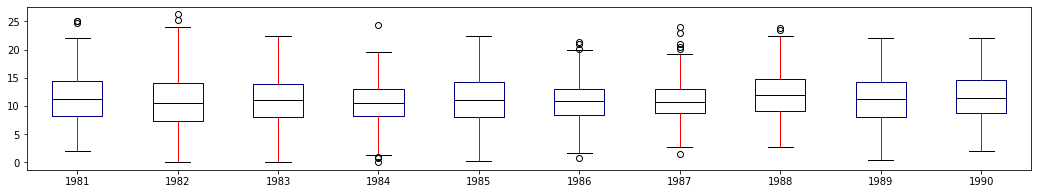

In [13]:
color = {'boxes': 'navy', 'whiskers': 'r', 'medians': 'black', 'caps': 'Black'}

df.head(10).T.boxplot(color=color, grid=False);

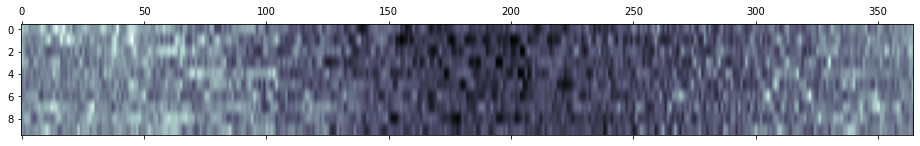

In [14]:
plt.matshow(df, interpolation=None, aspect='auto', cmap='bone');

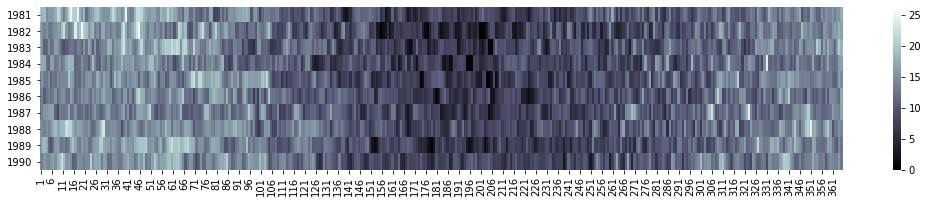

In [15]:
sns.heatmap(df,cmap='bone');

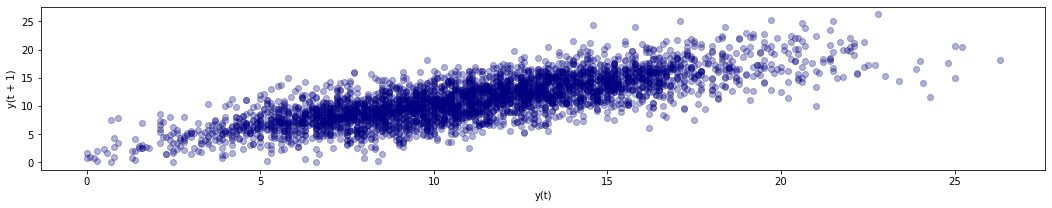

In [16]:
lag_plot(s,c='navy', alpha=0.3);

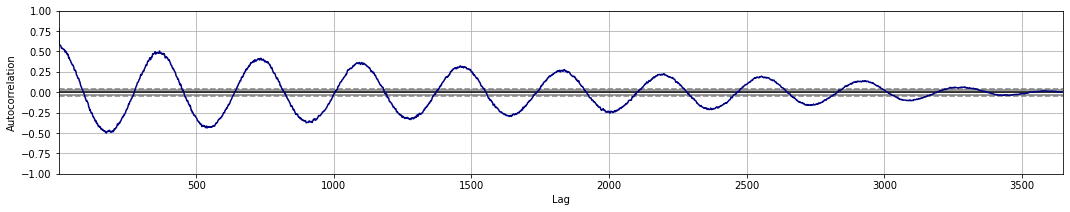

In [17]:
autocorrelation_plot(s,color='navy');

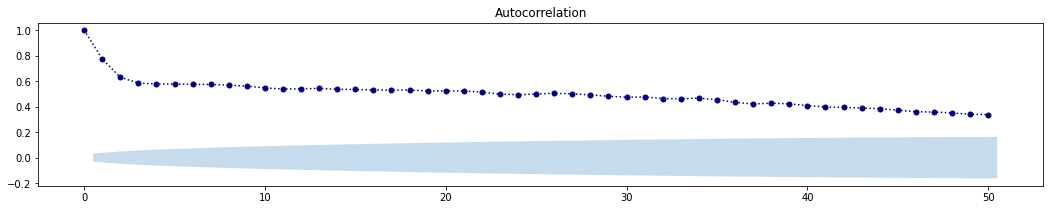

In [18]:
plot_acf(s, lags=50, color='navy', linestyle=':',use_vlines=False)
plt.show()

## Planteamiento del problema

La idea para este proyecto es predecir para un tiempo posterior, la temeratura mínima en Melbourne, Australia teniendo en cuenta los datos pasados que están en la serie temporal

### Dividimos el dataset en train y test set.

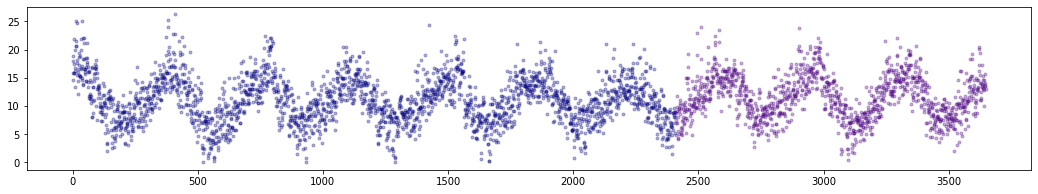

In [19]:
X = s.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
plt.plot(train,'.',color='navy', alpha=0.3)
plt.plot([None for i in train] + [x for x in test],'.', color='indigo', alpha = 0.3);

## Modelo Persistente

In [20]:
def model_persistence(x):
    return x

values = pd.DataFrame(s.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3650
Training Observations: 2408
Testing Observations: 1241


In [21]:
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.613


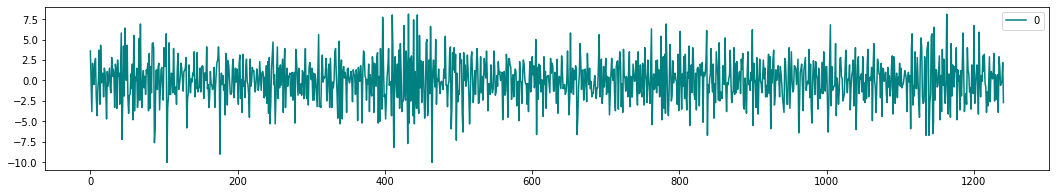

In [22]:
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.plot(color='teal');

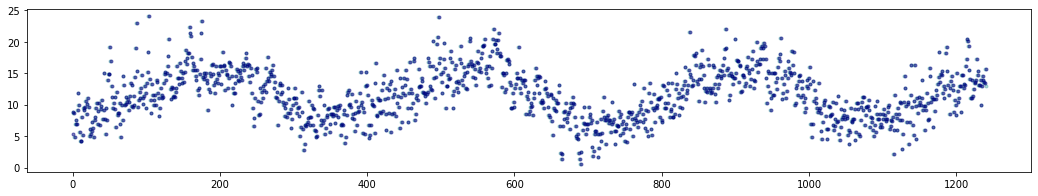

In [23]:
plt.plot(test_y,'.',color='teal',alpha=0.3)
plt.plot(predictions,'.',color='navy', alpha = 0.5)
plt.show()

## Modelo AR con ventana de tamaño 2

In [24]:
values = pd.DataFrame(s.values)
width = 2
shifted = values.shift(width - 1)
window = shifted.rolling(window=width)
df = pd.concat([window.min(), window.mean(), window.max(),window.max() - window.min(), window.std(),values], axis=1)
df.columns = ['min', 'mean', 'max', 'range', 'std', 't+1']
df.head(10)

min  mean   max  range  std   t+1
0   nan   nan   nan    nan  nan 20.70
1   nan   nan   nan    nan  nan 17.90
2 17.90 19.30 20.70   2.80 1.98 18.80
3 17.90 18.35 18.80   0.90 0.64 14.60
4 14.60 16.70 18.80   4.20 2.97 15.80
5 14.60 15.20 15.80   1.20 0.85 15.80
6 15.80 15.80 15.80   0.00 0.00 15.80
7 15.80 15.80 15.80   0.00 0.00 17.40
8 15.80 16.60 17.40   1.60 1.13 21.80
9 17.40 19.60 21.80   4.40 3.11 20.00

In [25]:
X = df.values  
train_size = int(len(X) * 0.66)
train, test = X[2:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
train_pred = [x for x in train_X]
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d'% (window))

Lag=27


In [26]:
print('Coeficientes:') 
for c in coef:
    print('\t\t{:0.4f}'.format(c))

Coeficientes:
		0.6392
		0.0851
		0.0827
		-0.0007
		0.0042
		0.0416
		0.0586
		-0.0129
		0.0068
		0.0291
		-0.0042
		0.0066
		-0.0079
		-0.0049
		0.0173
		-0.0094
		0.0088
		-0.0034
		0.0173
		-0.0016
		0.0062
		-0.0082
		0.0400
		0.0157
		-0.0089
		0.0387
		0.0442
		-0.0290


In [27]:
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.307


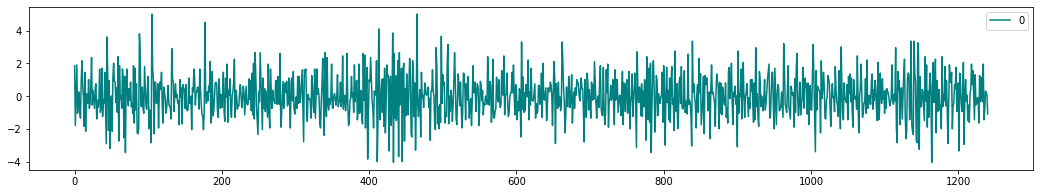

In [28]:
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.plot(color='teal');

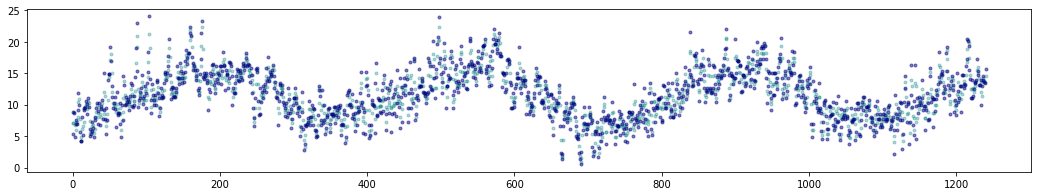

In [29]:
plt.plot(test_y,'.',color='teal',alpha=0.3)
plt.plot(predictions,'.',color='navy', alpha = 0.5)
plt.show()

## Modelo usando walk forward 

In [30]:
X = s.values
window = 1
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 2.731


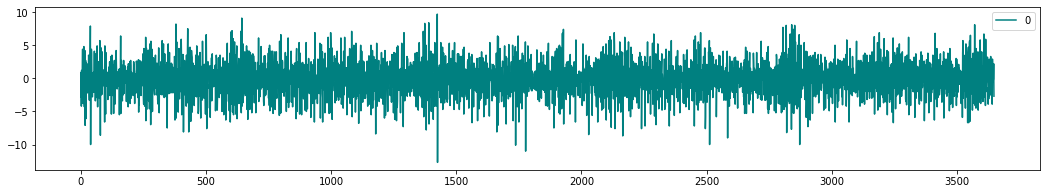

In [31]:
residuals = [test[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.plot(color='teal');

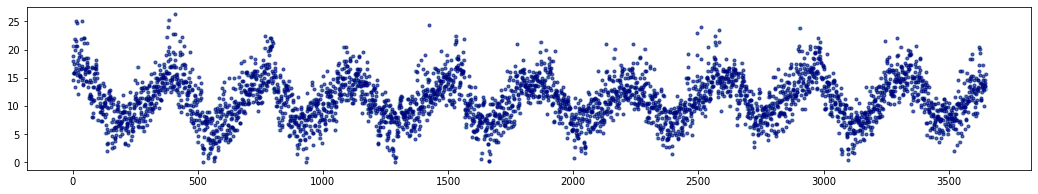

In [32]:
plt.plot(test,'.',color='teal',alpha=0.3)
plt.plot(predictions,'.',color='navy', alpha = 0.5)
plt.show()

## Modelo ARIMA

In [33]:
model = ARIMA(s[:'1989'], order=(2,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3285
Model:                     ARMA(2, 1)   Log Likelihood               -7588.993
Method:                       css-mle   S.D. of innovations              2.438
Date:                Mon, 30 Nov 2020   AIC                          15187.986
Time:                        20:26:55   BIC                          15218.472
Sample:                             0   HQIC                         15198.901
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4662      0.924     12.409      0.000       9.655      13.277
ar.L1.y        1.4541      0.019     78.467      0.000       1.418       1.490
ar.L2.y       -0.4579      0.018    -25.144      0.0

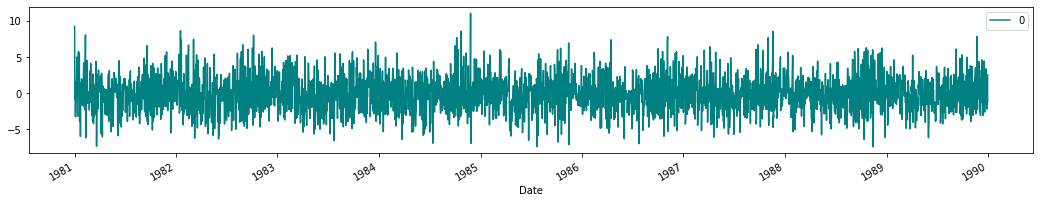

In [34]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(color='teal');

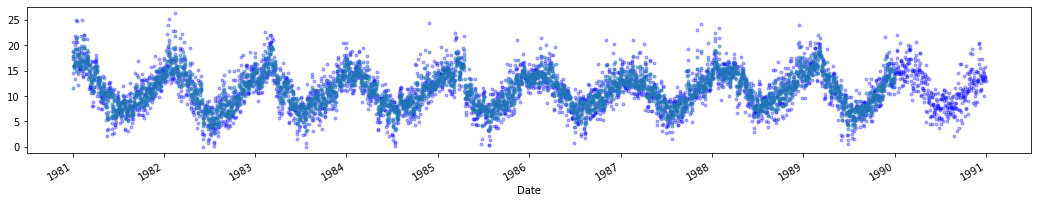

In [35]:
plt.figure(1)
s.plot(style='b.',alpha=0.3)
model_fit.predict().plot(style='.',alpha=0.5);

In [46]:
train, test = s[:'1989'].values,s['1990':].values
predictions = []
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat[0])
    history.append(test[t])

In [37]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print("RMSE: {:0.4f}".format(rmse))

RMSE: 2.2907


In [47]:
dic = {'Date':s['1990':].index,'Temp':predictions}
dataframe = pd.DataFrame(dic).set_index('Date')
predict_s = pd.Series(dataframe.unstack().values, index=dataframe.index)

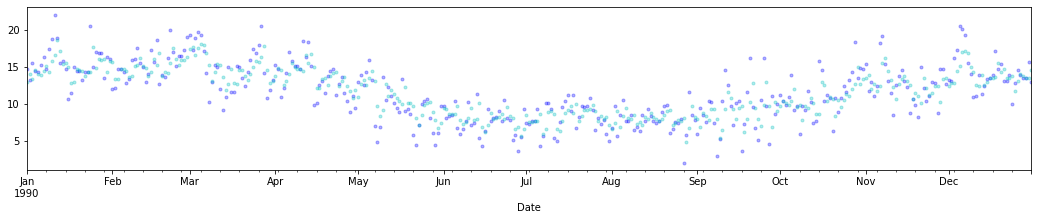

In [49]:
s['1990':].plot(style='b.',alpha=0.3)
predict_s.plot(style='c.',alpha=0.3);